In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets
from sklearn.linear_model import LogisticRegression
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
digits = datasets.load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=23)

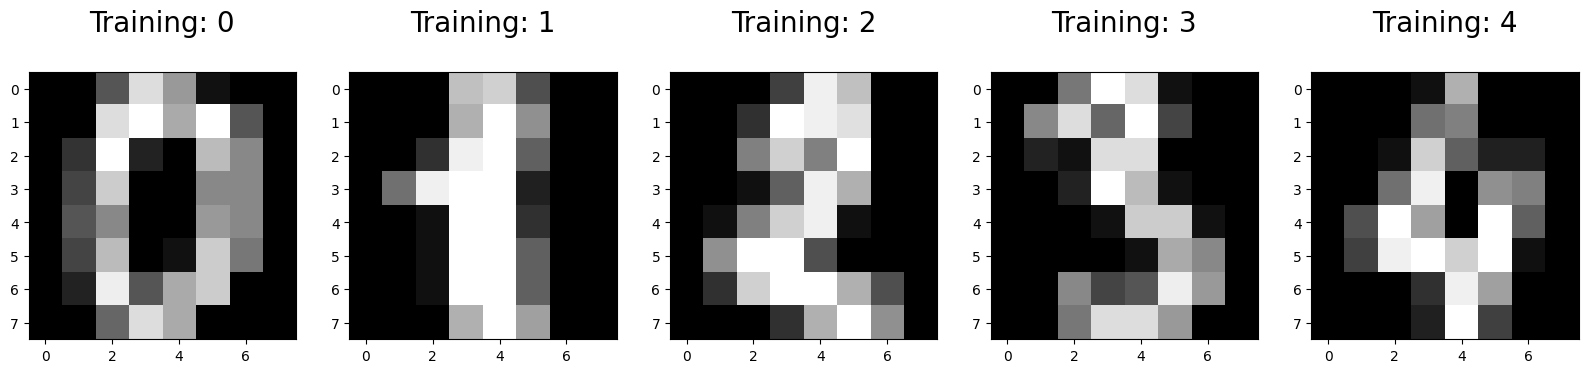

In [17]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1,5,index+1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

In [29]:
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)
y_pred = logistic_reg_model.predict(X_test)
score = logistic_reg_model.score(X_test, y_test)
score

C:\Users\wq\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9685990338164251

In [30]:
# confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 46,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  1, 44,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  1,  0, 35,  0,  0],
       [ 0,  1,  0,  0,  0,  2,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 47]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.9685990338164251')

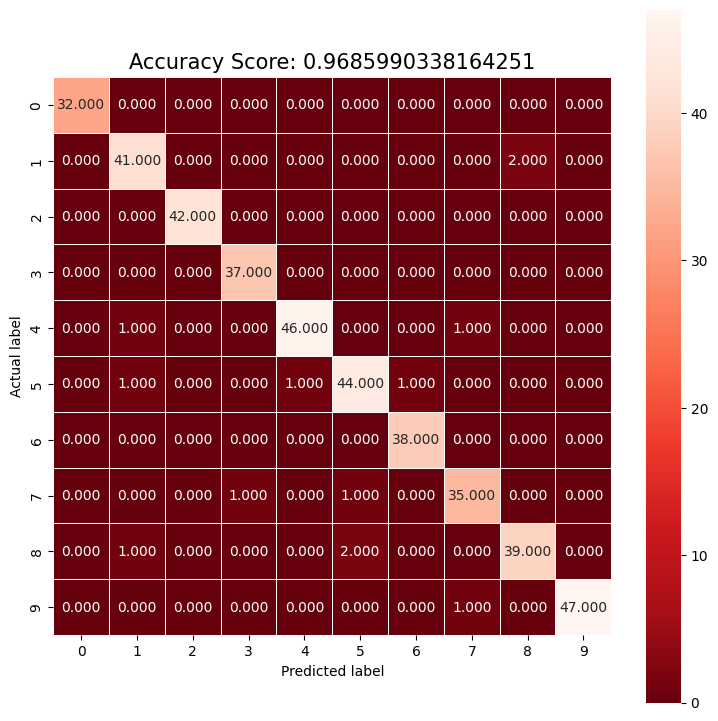

In [42]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot= True, fmt='.3f', linewidths=.5, square=True, cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

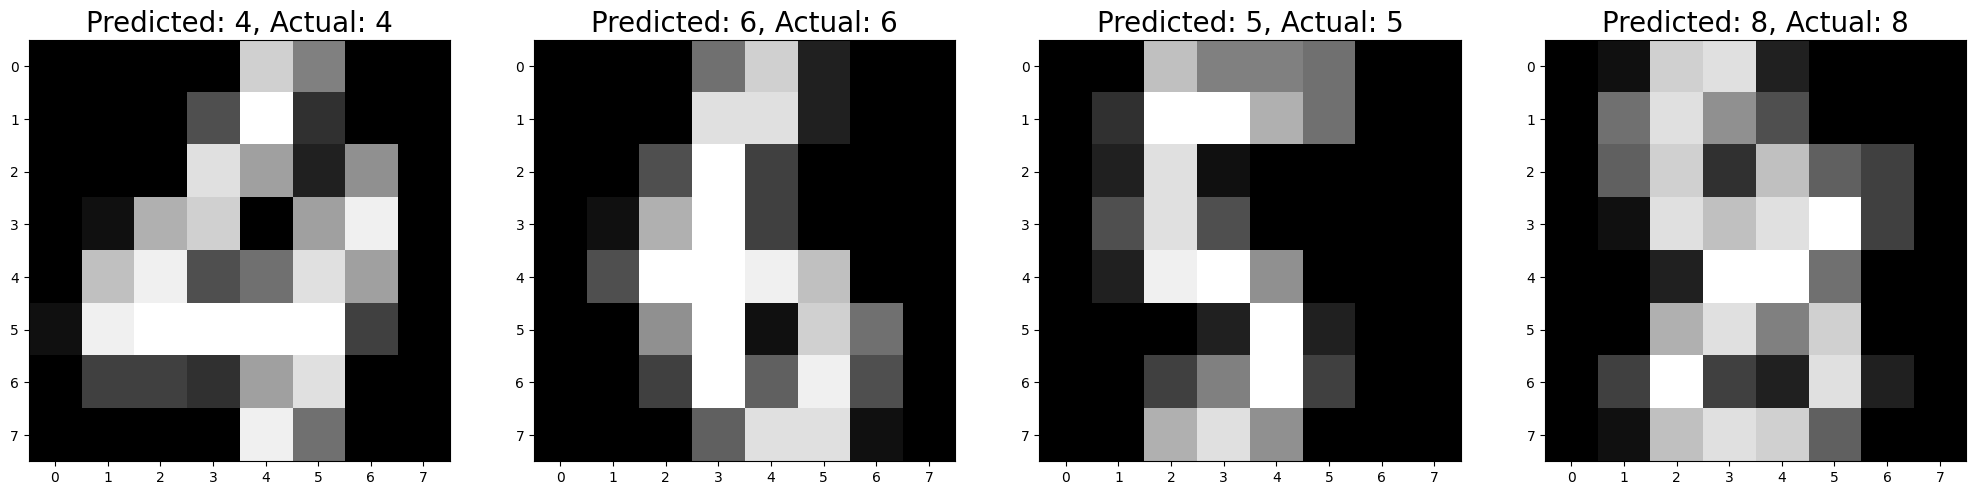

In [61]:
index = 0
classifiedIndex = []
for predict, actual in zip(y_pred, y_test):
  if predict == actual:
    classifiedIndex.append(index)
  index += 1

plt.figure(figsize=(25,8))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
  plt.subplot(1,4,plotIndex+1)
  plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
  plt.title('Predicted: {}, Actual: {}'.format(y_pred[wrong], y_test[wrong]), fontsize=20)
  

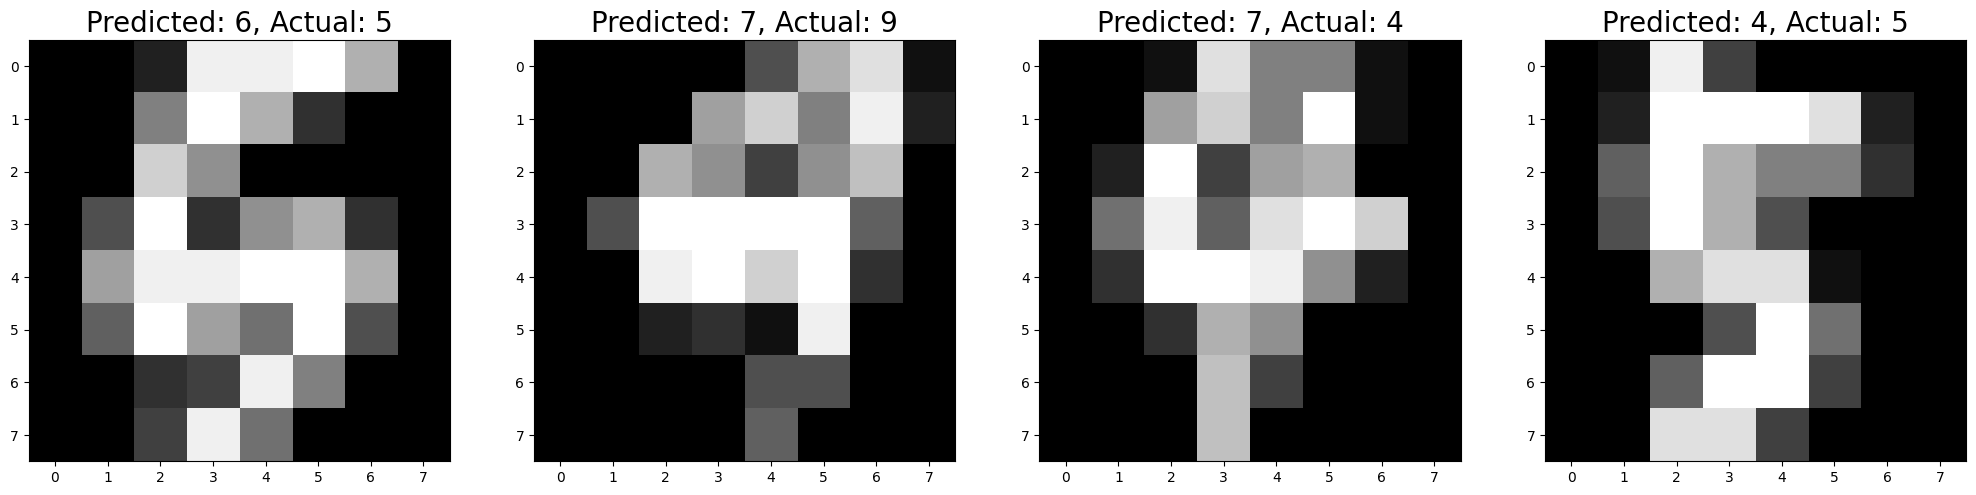

In [62]:
index = 0
classifiedIndex = []
for predict, actual in zip(y_pred, y_test):
  if predict != actual:
    classifiedIndex.append(index)
  index += 1

plt.figure(figsize=(25,8))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
  plt.subplot(1,4,plotIndex+1)
  plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
  plt.title('Predicted: {}, Actual: {}'.format(y_pred[wrong], y_test[wrong]), fontsize=20)
  